# Task 1
### Part 1

In [1]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import VGG16
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2

# data source: https://www.kaggle.com/datasets/gpiosenka/time-image-datasetclassification?select=clocks.csv
df = pd.read_csv('clocks.csv')

2022-11-02 09:22:55.999068: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 09:22:56.153498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-02 09:22:56.153536: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-02 09:22:56.181023: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-02 09:22:57.050708: W tensorflow/stream_executor/platform/de

In [2]:
df.head()

,class index,filepaths,labels,data set
0,0,train/1-00/0.jpg,1_00,train
1,0,train/1-00/1.jpg,1_00,train
2,0,train/1-00/11.jpg,1_00,train
3,0,train/1-00/12.jpg,1_00,train
4,0,train/1-00/13.jpg,1_00,train


In [3]:
df.shape

(14400, 4)

In [4]:
df.isna().sum()

class index    0
filepaths      0
labels         0
data set       0
dtype: int64

In [5]:
labels = []
for i in range(144):
    labels.append(i)
    
nb_classes = len(labels)

In [6]:
train_images = []
train_labels = []
train = []
valid_images = []
valid_labels = []
valid = []
test_images = []
test_labels = []
test = []

for index, row in df.iterrows():
    if row['data set'] == 'train':
        image = cv2.imread(row['filepaths'])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
        label = labels[row['class index']]
            
        train_images.append(image)
        train_labels.append(label)
    if row['data set'] == 'valid':
        image = cv2.imread(row['filepaths'])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
        label = labels[row['class index']]
            
        valid_images.append(image)
        valid_labels.append(label)
    if row['data set'] == 'test':
        image = cv2.imread(row['filepaths'])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
        label = labels[row['class index']]
            
        test_images.append(image)
        test_labels.append(label)

train_images = np.array(train_images, dtype = 'float32')
train_labels = np.array(train_labels, dtype = 'int32') 
valid_images = np.array(valid_images, dtype = 'float32')
valid_labels = np.array(valid_labels, dtype = 'int32')  
test_images = np.array(test_images, dtype = 'float32')
test_labels = np.array(test_labels, dtype = 'int32')

train_images, train_labels = shuffle(train_images, train_labels, random_state=10)
valid_images, valid_labels = shuffle(valid_images, valid_labels, random_state=10)
test_images, test_labels = shuffle(test_images, test_labels, random_state=10)

train_images = train_images / 255.0 
valid_images = valid_images / 255.0
test_images = test_images / 255.0

train.append((train_images, train_labels))
valid.append((valid_images, valid_labels))
test.append((test_images, test_labels))

In [7]:
print(train_labels.shape) 
print(train_images.shape)

print(valid_labels.shape) 
print(valid_images.shape)

print(test_labels.shape) 
print(test_images.shape)

(11520,)
(11520, 224, 224, 3)
(1440,)
(1440, 224, 224, 3)
(1440,)
(1440, 224, 224, 3)


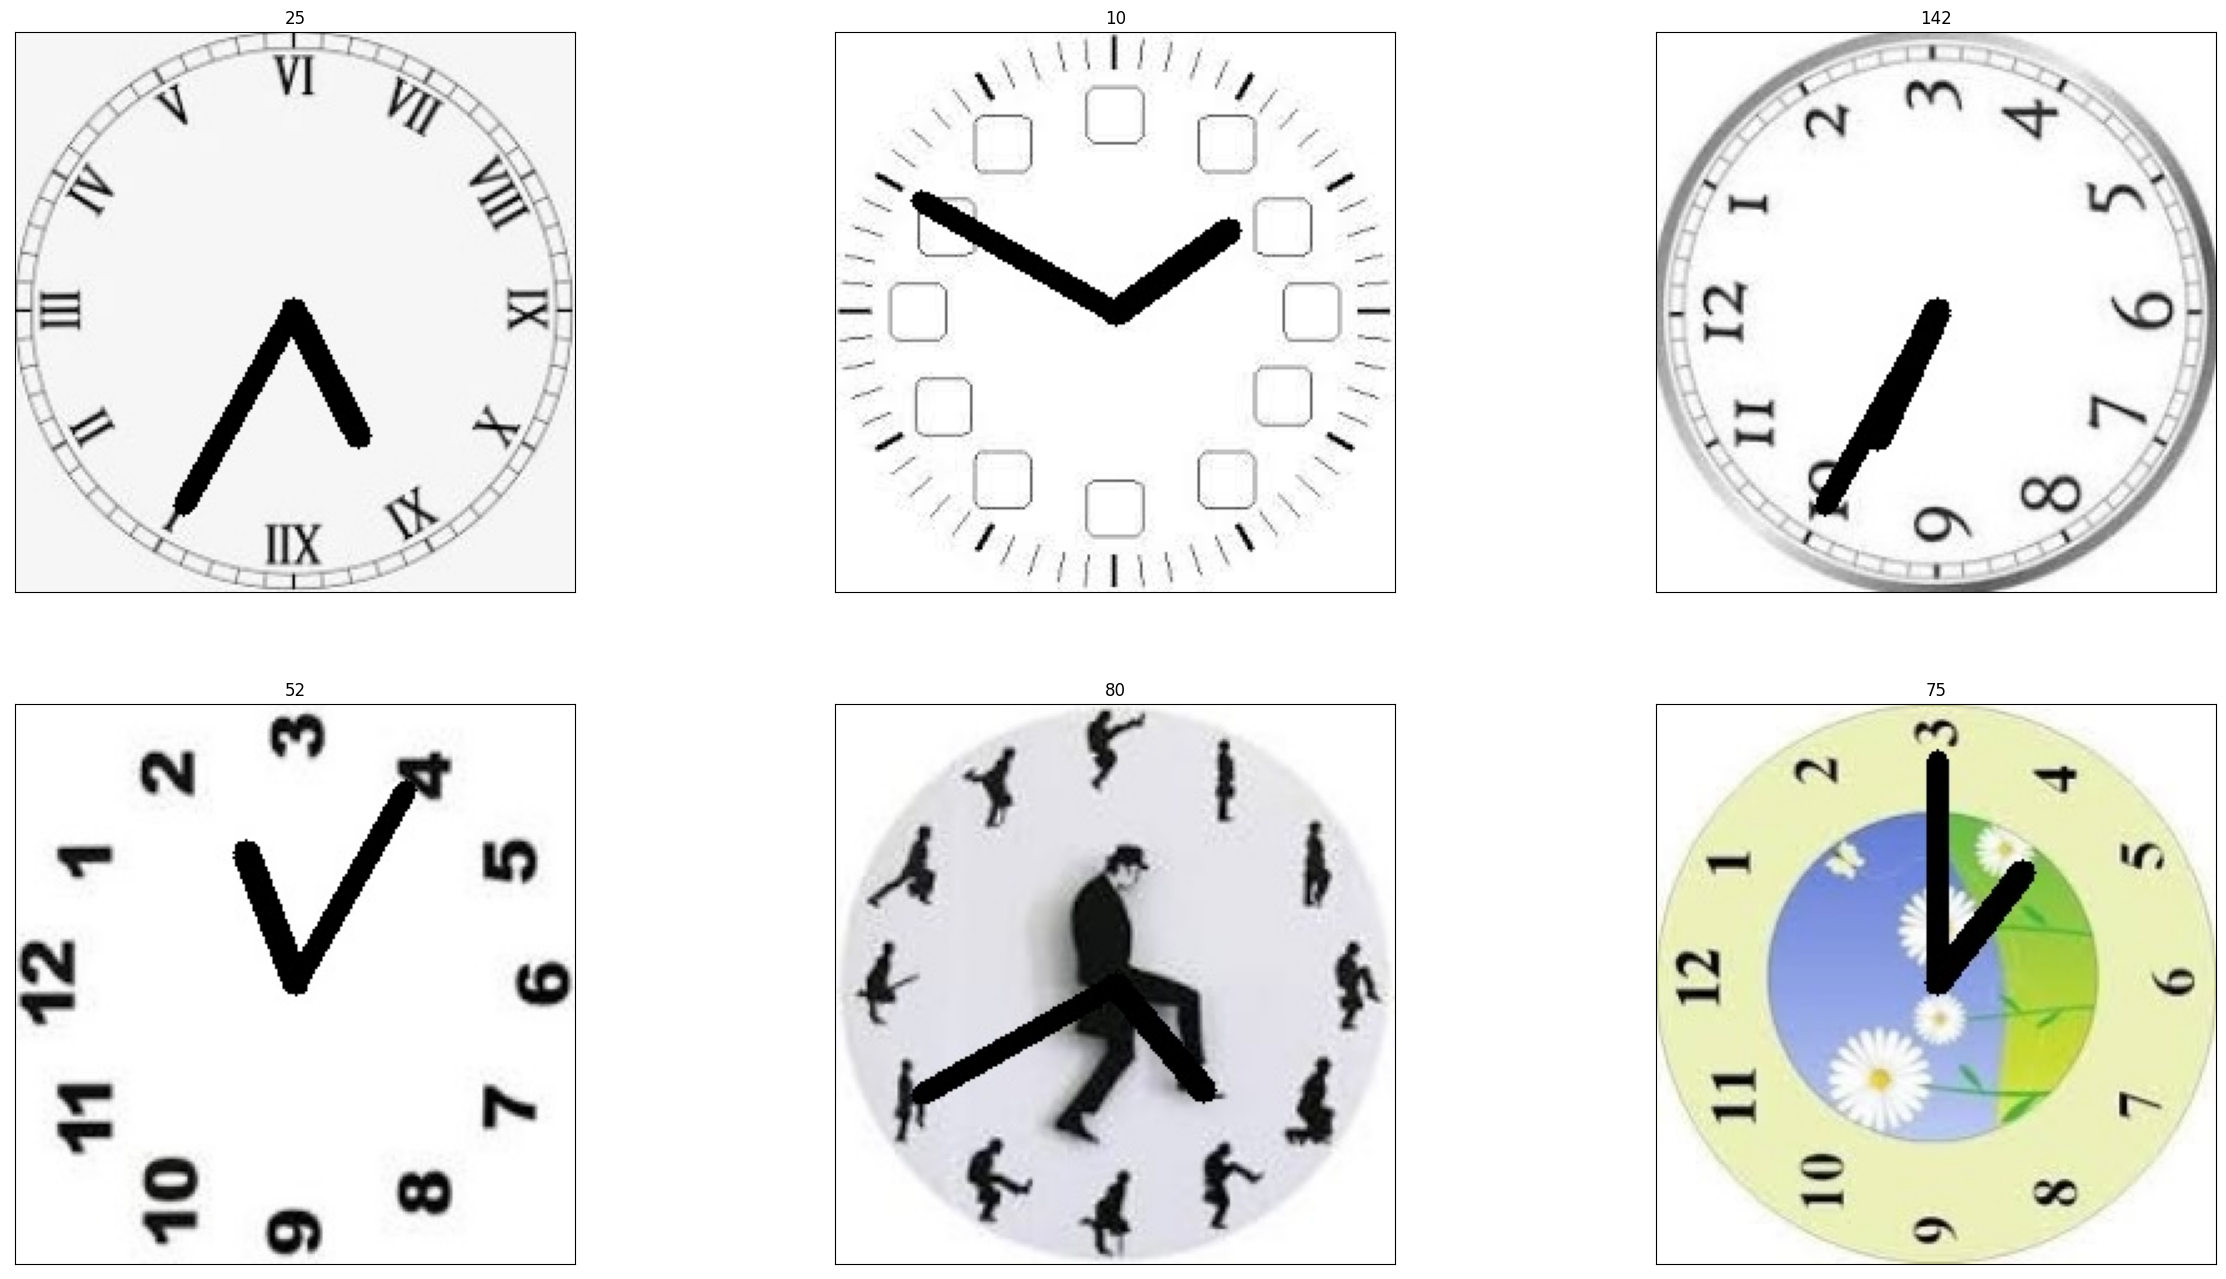

In [8]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(30,16))
for col in range(3):
    for row in range(2):
        ax[row,col].imshow(train_images[row*3+col])
        ax[row,col].set_title(train_labels[row*3+col])    
        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])

I chose to add two Conv2D layers, each followed by a MaxPooling2D layer and a dropout layer, as I found this increased the accuracy and speed at which the model was trained while avoiding overfitting as much as possible. Initially, I added only one Conv2D layer and one MaxPooling2D layer and found the accuracy was very low for the training set and was even worse for the validation set. Bumping the number of Conv2D layers and MaxPooling2D layers to three led to a drastic increase in the accuracy and decrease on the loss for the training set but, likely due to overfitting, accuracy for the validation set decreased compared to the accuracy with two layers. So, I chose the middle ground of 2 layers of Conv2D and MaxPooling2D respectively. Adding in dropout layers further decreased overfitting. I experimented with adding additional dense layers as well as dropout layers, but found they had a largely detrimental effect on the model's training speed and accuracy.

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(144, activation=tf.nn.softmax)
])

In [62]:
print (model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 54, 54, 32)       

In [63]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [59]:
hist = model.fit(train_images, train_labels, batch_size=32, epochs=8, validation_data=(valid_images, valid_labels))

Epoch 1/8
360/360 [==============================] - 430s 1s/step - loss: 3.2407 - accuracy: 0.4451 - val_loss: 1.3923 - val_accuracy: 0.6257
Epoch 2/8
360/360 [==============================] - 442s 1s/step - loss: 1.0266 - accuracy: 0.7130 - val_loss: 1.1097 - val_accuracy: 0.7160
Epoch 3/8
360/360 [==============================] - 426s 1s/step - loss: 0.7104 - accuracy: 0.8098 - val_loss: 0.9140 - val_accuracy: 0.7944
Epoch 4/8
360/360 [==============================] - 411s 1s/step - loss: 0.4952 - accuracy: 0.8690 - val_loss: 0.8521 - val_accuracy: 0.8222
Epoch 5/8
360/360 [==============================] - 418s 1s/step - loss: 0.3464 - accuracy: 0.9136 - val_loss: 0.8582 - val_accuracy: 0.8306
Epoch 6/8
360/360 [==============================] - 440s 1s/step - loss: 0.2551 - accuracy: 0.9361 - val_loss: 0.9047 - val_accuracy: 0.8576
Epoch 7/8
360/360 [==============================] - 438s 1s/step - loss: 0.1895 - accuracy: 0.9530 - val_loss: 0.8915 - val_accuracy: 0.8681
Epoch 

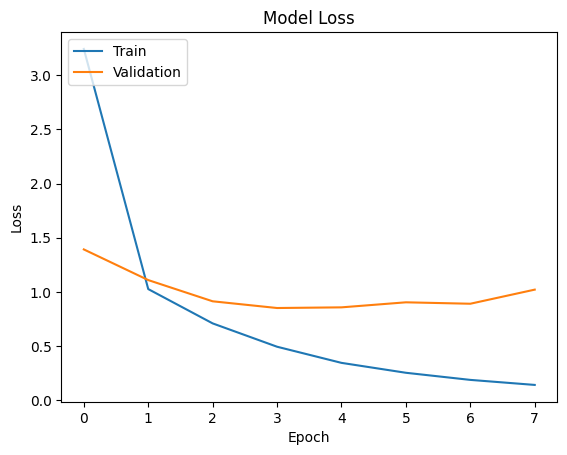

In [60]:
#show loss convergence
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [65]:
loss = model.evaluate(test_images, test_labels)
print("test loss:", loss)

45/45 [==============================] - 14s 306ms/step - loss: 0.9553 - accuracy: 0.8632
test loss: [0.9552631974220276, 0.863194465637207]


The accuracy on all the data sets was fairly high. I chose to use sparse categorical cross entropy as my loss function. The loss was relatively low for the training sets, but remained somewhat high for the validation and test sets. Furthermore, the loss did not converge for the validation set regardless of how I modified the hyperparameters. This suggests that data augmentation may be necessary to increase the accuracy of the model on data sets other than the one it was trained on.

### Part 2

In [15]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3), include_top=False)

model_mn = Sequential()
model_mn.add(mobilenet)
model_mn.add(layers.MaxPooling2D())
model_mn.add(layers.Flatten())
model_mn.add(layers.Dense(144, activation="softmax"))

In [16]:
model_mn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model_mn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 1024)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 144)               1327248   
                                                                 
Total params: 4,556,112
Trainable params: 4,534,224
Non-trainable params: 21,888
_________________________________________________________________


In [17]:
hist_mn = model_mn.fit(train_images, train_labels, batch_size=32, epochs=8, validation_data = (valid_images, valid_labels))

Epoch 1/8


2022-11-02 10:25:49.085476: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6936330240 exceeds 10% of free system memory.


360/360 [==============================] - 1037s 3s/step - loss: 3.2649 - accuracy: 0.3929 - val_loss: 2.0512 - val_accuracy: 0.4625
Epoch 2/8
360/360 [==============================] - 976s 3s/step - loss: 0.5162 - accuracy: 0.8331 - val_loss: 0.4801 - val_accuracy: 0.8472
Epoch 3/8
360/360 [==============================] - 845s 2s/step - loss: 0.2435 - accuracy: 0.9292 - val_loss: 0.2246 - val_accuracy: 0.9299
Epoch 4/8
360/360 [==============================] - 903s 3s/step - loss: 0.1456 - accuracy: 0.9602 - val_loss: 0.2984 - val_accuracy: 0.9076
Epoch 5/8
360/360 [==============================] - 891s 2s/step - loss: 0.0889 - accuracy: 0.9782 - val_loss: 0.0479 - val_accuracy: 0.9903
Epoch 6/8
360/360 [==============================] - 887s 2s/step - loss: 0.0927 - accuracy: 0.9782 - val_loss: 0.4414 - val_accuracy: 0.8868
Epoch 7/8
360/360 [==============================] - 892s 2s/step - loss: 0.1480 - accuracy: 0.9604 - val_loss: 0.4004 - val_accuracy: 0.8854
Epoch 8/8
360/3

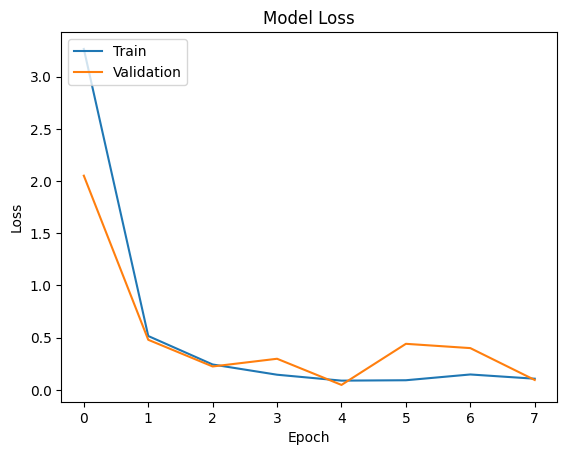

In [18]:
#show loss convergence
plt.plot(hist_mn.history['loss'])
plt.plot(hist_mn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
loss_mn = model_mn.evaluate(test_images, test_labels)
print("test loss:", loss_mn)

45/45 [==============================] - 30s 651ms/step - loss: 0.0902 - accuracy: 0.9771
test loss: [0.09017498046159744, 0.9770833253860474]


MobileNet performed better than the basic convolutional neural network across the board and the accuracy was high for all data sets. The values of the loss function remained low for the training set and was far lower for the validation and testing sets when compared to the basic CNN. Additionally, the loss function converged for the validation data when utilizing MobileNet. Overall, MobileNet did a better job of minimizing loss and increasing accuracy compared to the basic convolutional network without data augmentation. Improved performance of the model using MobileNet may be due to MobileNet's greater ability to train on smaller amounts of data on top of generally being a more accurate and efficient model than basic convolutional neural networks.

In [20]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

In [23]:
import os
import glob
os.mkdir("../Hw5-2/keras_augmentations")

train_generator = train_datagen.flow(train_images, train_labels, save_to_dir='../Hw5-2/keras_augmentations',
    save_prefix='Augmented_image',
    save_format='jpeg')

In [66]:
model_augment = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(144, activation=tf.nn.softmax)
])

model_augment.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model_augment.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 54, 54, 32)      

In [67]:
hist_augment = model_augment.fit_generator(train_generator, epochs=8, validation_data=(valid_images,valid_labels))

/tmp/ipykernel_10420/1696714370.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist_augment = model_augment.fit_generator(train_generator, epochs=8, validation_data=(valid_images,valid_labels))


Epoch 1/8
360/360 [==============================] - 459s 1s/step - loss: 4.0888 - accuracy: 0.2155 - val_loss: 2.4787 - val_accuracy: 0.3931
Epoch 2/8
360/360 [==============================] - 472s 1s/step - loss: 2.0858 - accuracy: 0.4834 - val_loss: 1.7937 - val_accuracy: 0.5868
Epoch 3/8
360/360 [==============================] - 458s 1s/step - loss: 1.5345 - accuracy: 0.6385 - val_loss: 1.3838 - val_accuracy: 0.6965
Epoch 4/8
360/360 [==============================] - 443s 1s/step - loss: 1.2426 - accuracy: 0.7238 - val_loss: 1.1690 - val_accuracy: 0.7590
Epoch 5/8
360/360 [==============================] - 431s 1s/step - loss: 1.0865 - accuracy: 0.7674 - val_loss: 1.0905 - val_accuracy: 0.7722
Epoch 6/8
360/360 [==============================] - 448s 1s/step - loss: 1.0051 - accuracy: 0.7926 - val_loss: 1.0839 - val_accuracy: 0.7951
Epoch 7/8
360/360 [==============================] - 437s 1s/step - loss: 0.9588 - accuracy: 0.8014 - val_loss: 1.0077 - val_accuracy: 0.8007
Epoch 

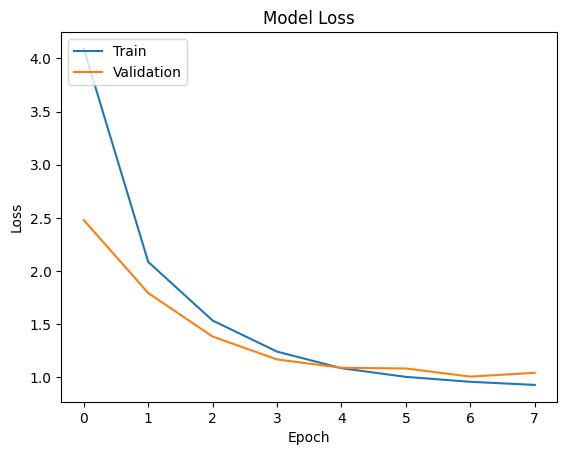

In [68]:
#show loss convergence
plt.plot(hist_augment.history['loss'])
plt.plot(hist_augment.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [69]:
loss_augment = model_augment.evaluate(test_images, test_labels)
print("test loss:", loss_augment)

45/45 [==============================] - 17s 382ms/step - loss: 1.0132 - accuracy: 0.8083
test loss: [1.013180136680603, 0.8083333373069763]


With data augmentation I found that the accuracy of the model was slightly lower for all data sets when compared to the basic CNN without data augmentation. However, data augmentation did allow the loss function to converge for the validation data, though the overall loss values tended to be a bit higher.

# Task 2
### Part 1

In [27]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [28]:
train_size = 11520
batch_size = 32
test_size = 1440

In [29]:
train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

2022-11-02 13:19:59.640881: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6936330240 exceeds 10% of free system memory.


In [30]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=16, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=3, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [31]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [32]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
print(random_vector_for_generation.shape)
model_vae = CVAE(latent_dim)

(16, 2)


In [33]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [34]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

Epoch: 10, Test set ELBO: -78363.96875, time elapse for current epoch: 283.96089005470276


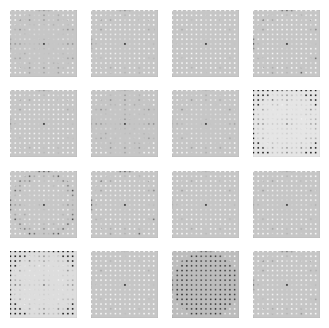

In [35]:
generate_and_save_images(model_vae, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
        train_step(model_vae, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model_vae, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model_vae, epoch, test_sample)

In [36]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

(-0.5, 399.5, 399.5, -0.5)

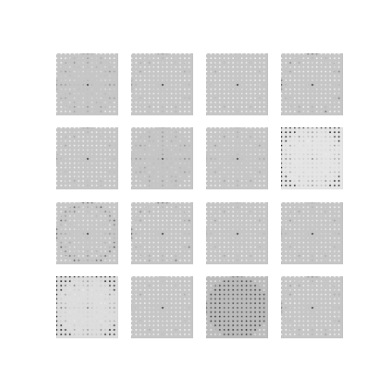

In [37]:
plt.imshow(display_image(epoch))
plt.axis('off')  # Display images

### Part 2

In [38]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [39]:
BUFFER_SIZE = 60000
BATCH_SIZE = 32#256

In [40]:
train_dataset_gans = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

2022-11-02 14:14:02.022731: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6936330240 exceeds 10% of free system memory.


In [41]:
def make_generator_model():
    model_gans = tf.keras.Sequential()
    model_gans.add(layers.Dense(7*7*32, use_bias=False, input_shape=(100,)))
    model_gans.add(layers.BatchNormalization())
    model_gans.add(layers.LeakyReLU())

    model_gans.add(layers.Reshape((7, 7, 32)))
    assert model_gans.output_shape == (None, 7, 7, 32)  # Note: None is the batch size

    model_gans.add(layers.Conv2DTranspose(32, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model_gans.output_shape == (None, 7, 7, 32)
    model_gans.add(layers.BatchNormalization())
    model_gans.add(layers.LeakyReLU())

    model_gans.add(layers.Conv2DTranspose(32, (5, 5), strides=(4, 4), padding='same', use_bias=False))
    assert model_gans.output_shape == (None, 28, 28, 32)
    model_gans.add(layers.BatchNormalization())
    model_gans.add(layers.LeakyReLU())

    model_gans.add(layers.Conv2DTranspose(3, (5, 5), strides=(8, 8), padding='same', use_bias=False, activation='tanh'))
    assert model_gans.output_shape == (None, 224, 224, 3)

    return model_gans

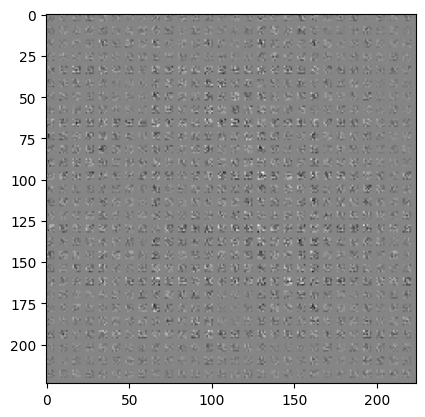

In [42]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [43]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[224, 224, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(3))

    return model

In [44]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00054499  0.00075372  0.00211847]], shape=(1, 3), dtype=float32)


In [45]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [46]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [47]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [48]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [49]:
EPOCHS_GANS = 10#50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [50]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [51]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [52]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

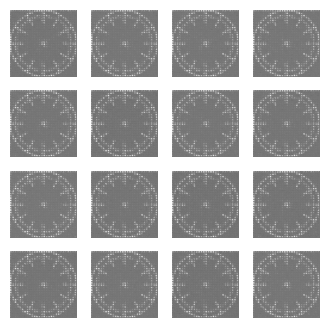

In [53]:
train(train_dataset_gans, EPOCHS_GANS)

The images generated likely depict clocks generally, rather than clocks showing specific times, because the pre-augmentation image data included rotated images in order to improve training of the model used for classification.

# Project Progress
Many of my classes this semester are very homework-heavy so I have made little progress on my final project thus far. I have found a few data sets that I plan to use and have looked through the data, but have not yet gotten to cleaning or preprocessing it, nor have I gotten to point of implementing any sort of model related to the project. The next steps I would need to take with the project are organizing and cleaning the data as well as visualizing it.